In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

MAIN_PATH = '/Users/a80099708/Downloads/'
df = pd.read_csv(MAIN_PATH +'uci-bank-full-1.csv')
original_df = df.copy()
term_deposits = df.copy()
# Have a grasp of how our data looks.
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
deposit      45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


/Users/a80099708/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



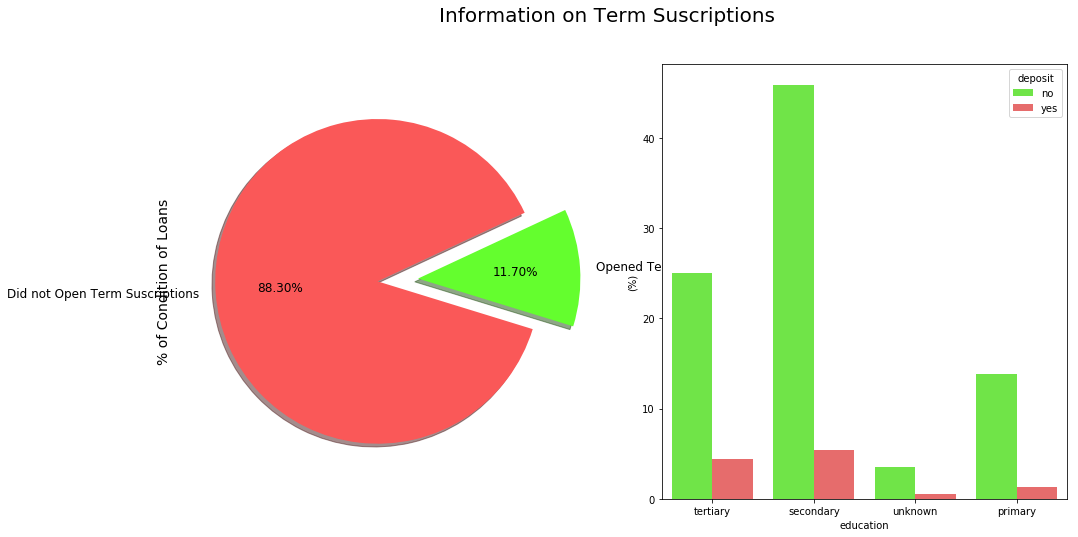

In [6]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df["deposit"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="education", y="balance", hue="deposit", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

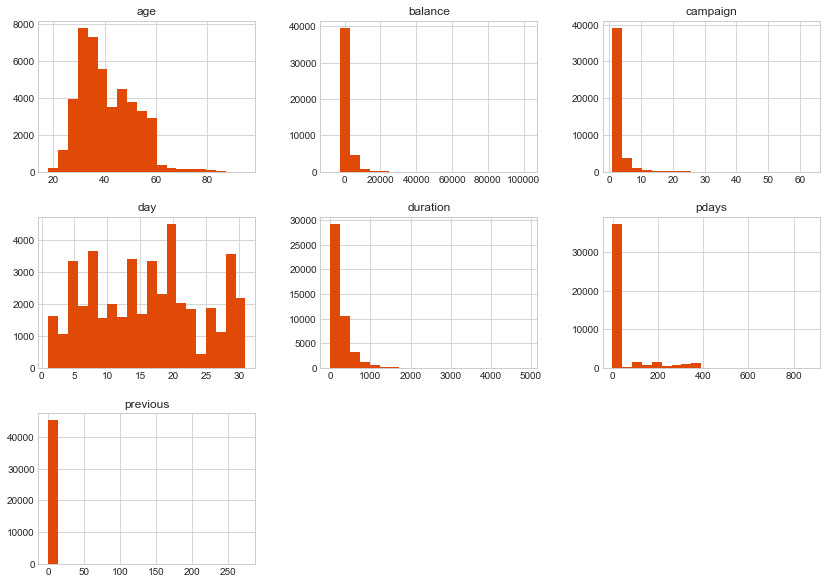

In [7]:
# Let's see how the numeric data is distributed.
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

In [8]:
# Classification 기준값인 deposit을 맨 앞으로 옮긴다.
dep = df['deposit']
#Drop the deposit column
df.drop(labels=['deposit'], axis=1,inplace = True)
df.insert(0, 'deposit', dep)
df.head()


,deposit,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,no,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,no,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,no,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,no,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,no,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [9]:
# deposit, house, loan, default 의 yes, no를 binary 0,1 값으로 변경
def convert_to_int(df, new_column, target_column):
    df[new_column] = df[target_column].apply(lambda x: 0 if x == 'no' else 1)
    return df[new_column].value_counts()


In [10]:
convert_to_int(df, "deposit_int", "deposit") #Create a deposit int
convert_to_int(df, "housing_int", "housing") # Create housingint column
convert_to_int(df, "loan_int", "loan") #Create a loan_int column
convert_to_int(df, "default_int", "default") #Create a default_int column


0    44396
1      815
Name: default_int, dtype: int64

In [11]:
# 변환전 3개 컬럼은 drop 처리한다.
df.drop(['housing', 'loan', 'default'], axis=1, inplace=True)

In [12]:
df.head()

,deposit,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit_int,housing_int,loan_int,default_int
0,no,58,management,married,tertiary,2143,unknown,5,may,261,1,-1,0,unknown,0,1,0,0
1,no,44,technician,single,secondary,29,unknown,5,may,151,1,-1,0,unknown,0,1,0,0
2,no,33,entrepreneur,married,secondary,2,unknown,5,may,76,1,-1,0,unknown,0,1,1,0
3,no,47,blue-collar,married,unknown,1506,unknown,5,may,92,1,-1,0,unknown,0,1,0,0
4,no,33,unknown,single,unknown,1,unknown,5,may,198,1,-1,0,unknown,0,0,0,0


In [13]:
#월별 분포 및, 가입/거절 비율

print(df['month'].value_counts())
cross_month = pd.crosstab(df['month'], df['deposit']).apply(lambda x: x/x.sum() * 100)
cross_month

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


deposit,no,yes
month,,
apr,5.899003,10.909435
aug,13.924653,13.008130
dec,0.285557,1.890717
feb,5.530785,8.338060
jan,3.158659,2.684818
jul,15.700616,11.854793
jun,12.010921,10.323313
mar,0.573619,4.688977
may,32.165222,17.489128


In [14]:
# 기준 년월 값으로 month정보를 변경한다. 

df['year'] = 2018
lst = [df]

# Create a column with the numeric values of the months.
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12

# Change datatype from int32 to int64
df["month_int"] = df["month_int"].astype(np.int64)
df.head()


,deposit,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit_int,housing_int,loan_int,default_int,year,month_int
0,no,58,management,married,tertiary,2143,unknown,5,may,261,1,-1,0,unknown,0,1,0,0,2018,5
1,no,44,technician,single,secondary,29,unknown,5,may,151,1,-1,0,unknown,0,1,0,0,2018,5
2,no,33,entrepreneur,married,secondary,2,unknown,5,may,76,1,-1,0,unknown,0,1,1,0,2018,5
3,no,47,blue-collar,married,unknown,1506,unknown,5,may,92,1,-1,0,unknown,0,1,0,0,2018,5
4,no,33,unknown,single,unknown,1,unknown,5,may,198,1,-1,0,unknown,0,0,0,0,2018,5


In [15]:
df.drop(['day','year', 'deposit'], axis=1, inplace=True)

In [16]:
# 불필요 컬럼 삭제 및 deposit binary 변환 컬럼을 맨 앞으로
df = df.rename(columns={"deposit_int": "deposit"})

In [17]:
df.head()

,age,job,marital,education,balance,contact,month,duration,campaign,pdays,previous,poutcome,deposit,housing_int,loan_int,default_int,month_int
0,58,management,married,tertiary,2143,unknown,may,261,1,-1,0,unknown,0,1,0,0,5
1,44,technician,single,secondary,29,unknown,may,151,1,-1,0,unknown,0,1,0,0,5
2,33,entrepreneur,married,secondary,2,unknown,may,76,1,-1,0,unknown,0,1,1,0,5
3,47,blue-collar,married,unknown,1506,unknown,may,92,1,-1,0,unknown,0,1,0,0,5
4,33,unknown,single,unknown,1,unknown,may,198,1,-1,0,unknown,0,0,0,0,5


In [18]:
first = df['deposit']
df.drop(labels=['deposit'], axis=1,inplace = True)
df.insert(0, 'deposit', first)
df.head()

,deposit,age,job,marital,education,balance,contact,month,duration,campaign,pdays,previous,poutcome,housing_int,loan_int,default_int,month_int
0,0,58,management,married,tertiary,2143,unknown,may,261,1,-1,0,unknown,1,0,0,5
1,0,44,technician,single,secondary,29,unknown,may,151,1,-1,0,unknown,1,0,0,5
2,0,33,entrepreneur,married,secondary,2,unknown,may,76,1,-1,0,unknown,1,1,0,5
3,0,47,blue-collar,married,unknown,1506,unknown,may,92,1,-1,0,unknown,1,0,0,5
4,0,33,unknown,single,unknown,1,unknown,may,198,1,-1,0,unknown,0,0,0,5


In [19]:
# 초 단위 상담시간을 분단위로 변경 (자료값의 범위가 너무 커서 조정이 필요함)
decimal_points = 2
df['duration'] = df['duration'] / 60
df['duration'] = df['duration'].apply(lambda x: round(x, decimal_points))
df.head()

,deposit,age,job,marital,education,balance,contact,month,duration,campaign,pdays,previous,poutcome,housing_int,loan_int,default_int,month_int
0,0,58,management,married,tertiary,2143,unknown,may,4.35,1,-1,0,unknown,1,0,0,5
1,0,44,technician,single,secondary,29,unknown,may,2.52,1,-1,0,unknown,1,0,0,5
2,0,33,entrepreneur,married,secondary,2,unknown,may,1.27,1,-1,0,unknown,1,1,0,5
3,0,47,blue-collar,married,unknown,1506,unknown,may,1.53,1,-1,0,unknown,1,0,0,5
4,0,33,unknown,single,unknown,1,unknown,may,3.30,1,-1,0,unknown,0,0,0,5


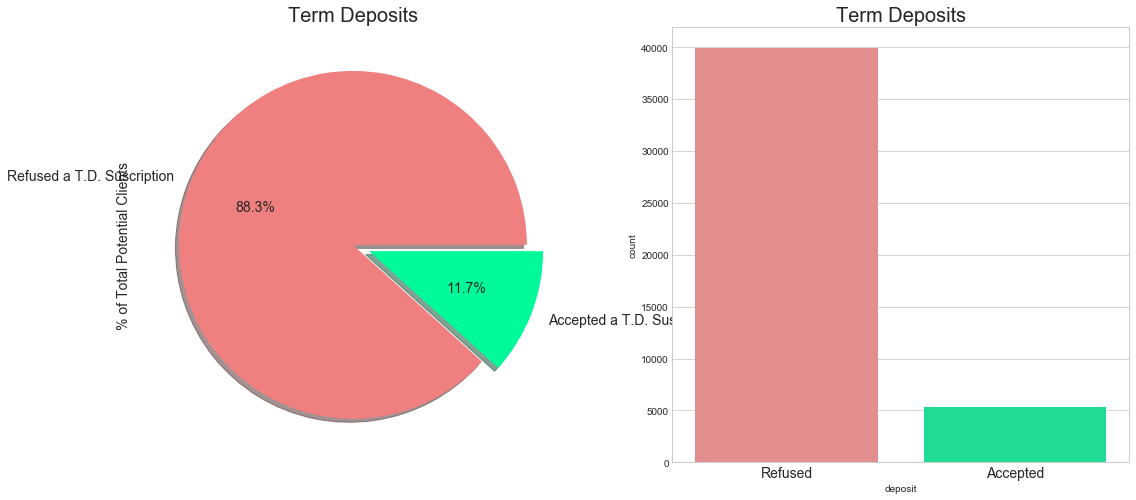

In [20]:
# 정기예금 가입자 수락 비율 분석
f,ax=plt.subplots(1,2,figsize=(18,8))
colors=["#F08080", "#00FA9A"]
labels = 'Refused a T.D. Suscription', 'Accepted a T.D. Suscription'
df['deposit'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, colors=colors, labels=labels,fontsize=14)
ax[0].set_title('Term Deposits', fontsize=20)
ax[0].set_ylabel('% of Total Potential Clients', fontsize=14)
sns.countplot('deposit',data=df,ax=ax[1], palette=colors)
ax[1].set_title('Term Deposits', fontsize=20)
ax[1].set_xticklabels(['Refused', 'Accepted'], fontsize=14)
plt.show()

/Users/a80099708/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



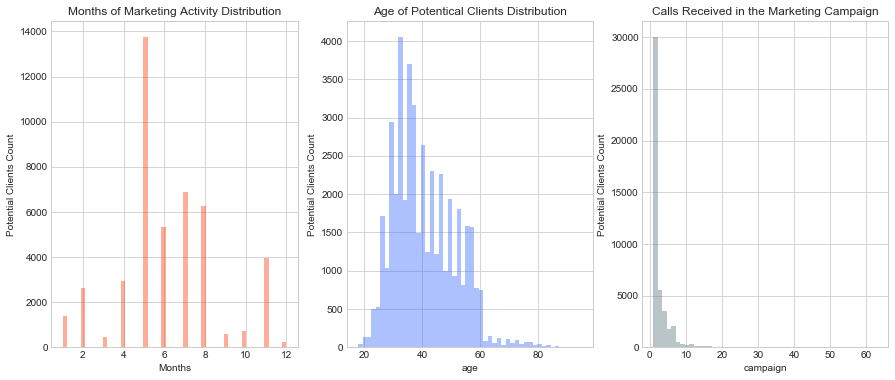

In [21]:
# 정기예금 가입에 영향도가 높을 것으로 예상되는 피쳐값에 대한 분포 확인
# 월별, 연령별, 마케팅 콜 횟수
import seaborn as sns

f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# 월별
sns.distplot(df['month_int'], kde=False, color="#ff3300", ax=axes[0]).set_title('Months of Marketing Activity Distribution')
axes[0].set_ylabel('Potential Clients Count')
axes[0].set_xlabel('Months')

# 연령별
sns.distplot(df['age'], kde=False, color="#3366ff", ax=axes[1]).set_title('Age of Potentical Clients Distribution')
axes[1].set_ylabel('Potential Clients Count')

# 마케팅 콜 횟수
sns.distplot(df['campaign'], kde=False, color="#546E7A", ax=axes[2]).set_title('Calls Received in the Marketing Campaign')
axes[2].set_ylabel('Potential Clients Count')

plt.show()


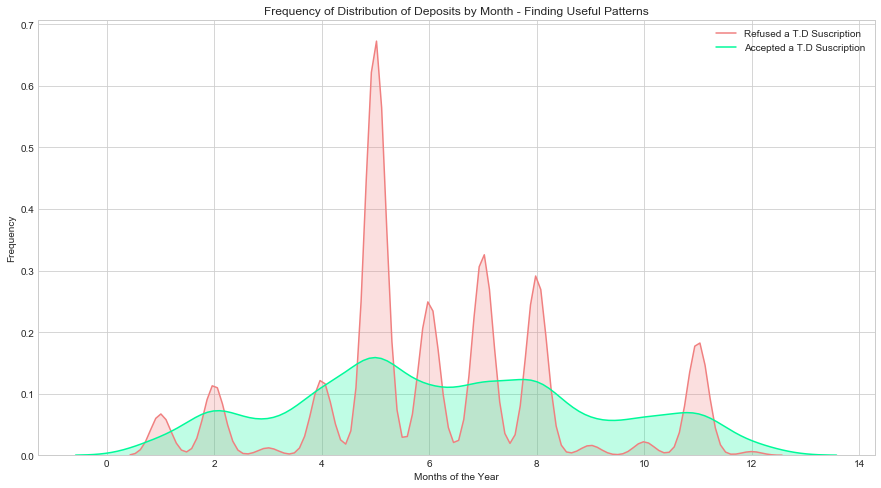

In [22]:
# 분석 1 : 월별 가입 수락률 분석
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(df.loc[(df['deposit'] == 0),'month_int'] , color='#F08080',shade=True,label='Refused a T.D Suscription')
ax=sns.kdeplot(df.loc[(df['deposit'] == 1),'month_int'] , color='#00FA9A',shade=True, label='Accepted a T.D Suscription')
ax.set(xlabel='Months of the Year', ylabel='Frequency')
plt.title('Frequency of Distribution of Deposits by Month - Finding Useful Patterns')
plt.show()


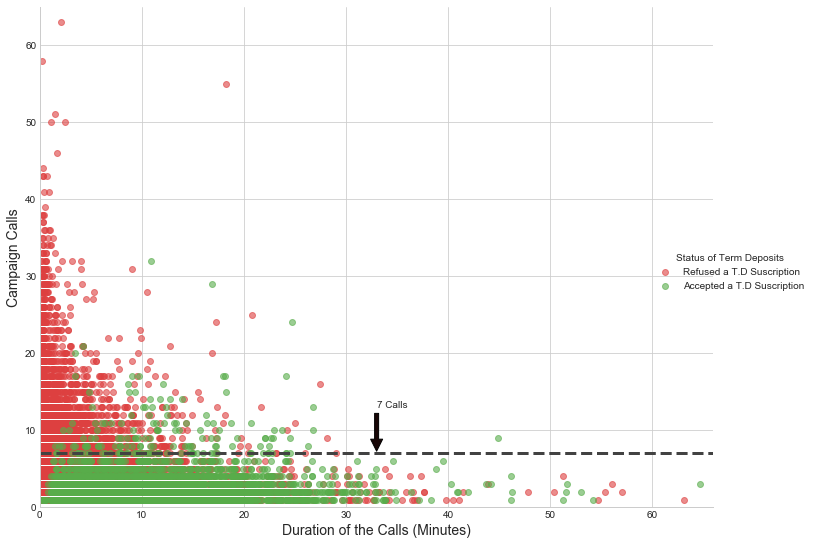

In [23]:
# 분석 2 : 마케팅 콜 횟수 및 연결 시간 대비 수락률 분석
colors = ['#DD4040', '#58AD4B', '#0096AA', '#9B00AA']


g = sns.lmplot(x='duration', y='campaign', data=df,
           fit_reg=False, # No regression line
           hue='deposit',
        palette = colors,
        scatter_kws={'alpha':0.6}
          ) 

g.fig.set_size_inches(12,8)
# title
new_title = 'Status of Term Deposits'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Refused a T.D Suscription', 'Accepted a T.D Suscription']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.axis([0,66,0,65])

# 가이드라인 위치 : 7번 마케팅 콜 이후로 거절비율이 급격히 증가한다.
plt.axhline(y=7, linewidth=3, color="#424242", linestyle='--')

# 화살표 설명
plt.annotate('7 Calls', xy=(33, 7), xytext=(33,13),
            arrowprops=dict(facecolor='#190707', shrink=0.05))
plt.xlabel('Duration of the Calls (Minutes)', fontsize=14)
plt.ylabel('Campaign Calls', fontsize=14)

plt.show()


In [24]:
total_deposit = df['deposit'].count()
per_deposit = df['deposit'].value_counts()/total_deposit * 100

accepted = per_deposit[0]
refused = per_deposit[1]


In [25]:
print(accepted, refused)

88.30151954170445 11.698480458295547


In [26]:
success_rate = pd.crosstab(df['deposit'], df['campaign']).apply(lambda x: x/x.sum() * 100)
print(success_rate) #Notice rejection for offers increases after three calls that should be the threshold for the marketing team
#Nevetheless, this makes 90% of our potential clients so only 10% is likely to reject, we still save time and effort.
onecall_nod = success_rate.at[0,1]
onecall_d = success_rate.at[1,1]
twocalls_nod = success_rate.at[0,2]
twocalls_d = success_rate.at[1,2]
threecalls_nod = success_rate.at[0,3]
threecalls_d = success_rate.at[1,3]
fourcalls_nod = success_rate.at[0,4]
fourcalls_d = success_rate.at[1,4]
fivecalls_nod = success_rate.at[0,5]
fivecalls_d = success_rate.at[1,5]
sixcalls_nod = success_rate.at[0,6]
sixcalls_d = success_rate.at[1,6]
sevencalls_nod = success_rate.at[0,7]
sevencalls_d = success_rate.at[1,7]

campaign         1          2          3          4          5          6   \
deposit                                                                      
0         85.402417  88.796481  88.806376  90.999432  92.120181  92.873741   
1         14.597583  11.203519  11.193624   9.000568   7.879819   7.126259   

campaign         7          8          9          10  ...       39     41  \
deposit                                               ...                   
0         93.605442  94.074074  93.577982  94.736842  ...    100.0  100.0   
1          6.394558   5.925926   6.422018   5.263158  ...      0.0    0.0   

campaign     43     44     46     50     51     55     58     63  
deposit                                                           
0         100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  
1           0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[2 rows x 48 columns]


In [27]:
onecall_nod =  round(onecall_nod, 2)
onecall_d = round(onecall_d, 2)
twocalls_nod = round(twocalls_nod,2)
twocalls_d = round(twocalls_d, 2)
threecalls_nod = round(threecalls_nod, 2)
threecalls_d = round(threecalls_d, 2)
fourcalls_nod = round(fourcalls_nod, 2)
fourcalls_d = round(fourcalls_d, 2)
fivecalls_nod = round(fivecalls_nod, 2)
fivecalls_d = round(fivecalls_d, 2)
sixcalls_nod = round(sixcalls_nod, 2)
sixcalls_d = round(sixcalls_d, 2)
sevencalls_nod = round(sevencalls_nod, 2)
sevencalls_d = round(sevencalls_d, 2)


accepted = round(accepted, 2)
refused = round(refused, 2)


In [28]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as FF

# Add table data
table_data = [['Number of <br> Calls', 'Refused T.D', 'Accepted T.D'],
              ['One Call', onecall_nod , onecall_d],
              ['Two Calls', twocalls_nod , twocalls_d],
              ['Three Calls', threecalls_nod, threecalls_d],
              ['Four Calls', fourcalls_nod, fourcalls_d],
              ['Five Calls', fivecalls_nod, fivecalls_d],
              ['Six Calls', sixcalls_nod, sixcalls_d],
              ['Seven Calls', sevencalls_nod, sevencalls_d],
              ['Overall Performance', refused, accepted]]
# Initialize a figure with FF.create_table(table_data)
figure = FF.create_table(table_data, height_constant=60)

# Add graph data
calls = ['One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Overall Performance']
Ref = [onecall_nod, twocalls_nod, threecalls_nod, fourcalls_nod, fivecalls_nod, sixcalls_nod, sevencalls_nod, refused]
Acc = [onecall_d, twocalls_d, threecalls_d, fourcalls_d, fivecalls_d, sixcalls_d, sevencalls_d, accepted]


In [29]:
print(figure)

Figure({
    'data': [{'colorscale': [[0, '#00083e'], [0.5, '#ededee'], [1, '#ffffff']],
              'hoverinfo': 'none',
              'opacity': 0.75,
              'showscale': False,
              'type': 'heatmap',
              'uid': '004ebc0c-021f-49cb-bb40-32b815051fa3',
              'z': [[0, 0, 0], [0.5, 0.5, 0.5], [1, 1, 1], [0.5, 0.5, 0.5], [1, 1,
                    1], [0.5, 0.5, 0.5], [1, 1, 1], [0.5, 0.5, 0.5], [1, 1, 1]]}],
    'layout': {'annotations': [{'align': 'left',
                                'font': {'color': '#ffffff'},
                                'showarrow': False,
                                'text': '<b>Number of <br> Calls</b>',
                                'x': -0.45,
                                'xanchor': 'left',
                                'xref': 'x',
                                'y': 0,
                                'yref': 'y'},
                               {'align': 'left',
                                'font': {'

In [30]:
lst = [df]
for column in lst:
    column.loc[column["age"] < 30,  "age_category"] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), "age_category"] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), "age_category"] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), "age_category"] = 50
    column.loc[column["age"] >= 60, "age_category"] = 60
 
df['age_category'] = df['age_category'].astype(np.int64)
df.dtypes


deposit           int64
age               int64
job              object
marital          object
education        object
balance           int64
contact          object
month            object
duration        float64
campaign          int64
pdays             int64
previous          int64
poutcome         object
housing_int       int64
loan_int          int64
default_int       int64
month_int         int64
age_category      int64
dtype: object

In [31]:
cross_age_category = pd.crosstab(df['deposit'], df['age_category']).apply(lambda x: x/x.sum() * 100)
cross_age_category


age_category,20,30,40,50,60
deposit,,,,,
0,82.40091,89.424512,90.879451,90.665874,66.367713
1,17.59909,10.575488,9.120549,9.334126,33.632287


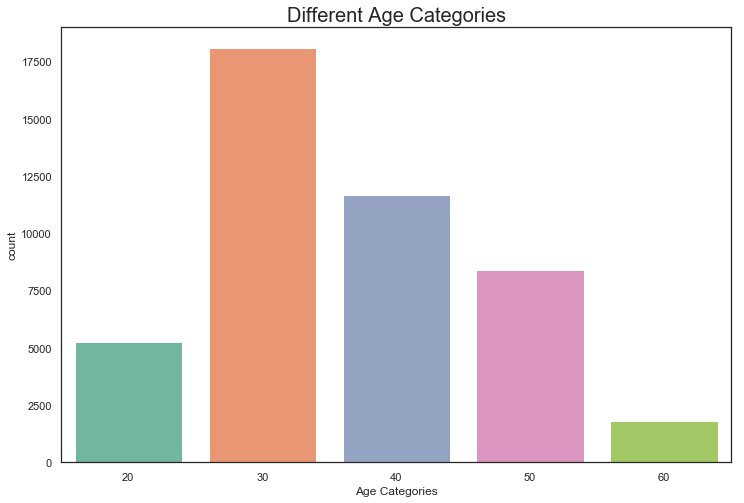

In [32]:
import seaborn as sns
sns.set(style="white")
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(x="age_category", data=df, palette="Set2")
ax.set_title("Different Age Categories", fontsize=20)
ax.set_xlabel("Age Categories")
plt.show()


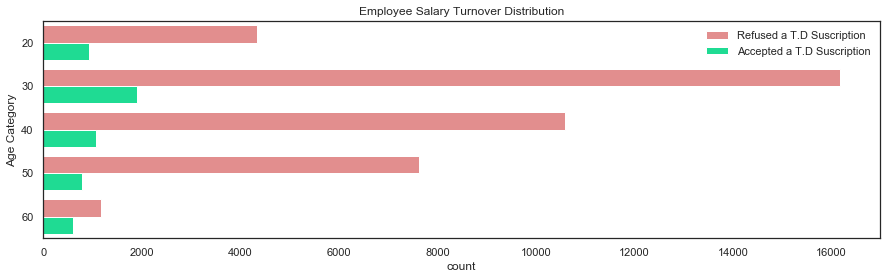

In [33]:
sns.set(style="white")
fig, ax = plt.subplots(figsize=(15, 4))
colors = ["#F08080", "#00FA9A"]
labels = ['No Deposit', 'Deposit']
sns.countplot(y="age_category", hue='deposit', data=df, palette=colors).set_title('Employee Salary Turnover Distribution')
ax.set_ylabel("Age Category")
legend_name = plt.legend()
legend_name.get_texts()[0].set_text('Refused a T.D Suscription')
legend_name.get_texts()[1].set_text('Accepted a T.D Suscription')


In [34]:
plt.show()

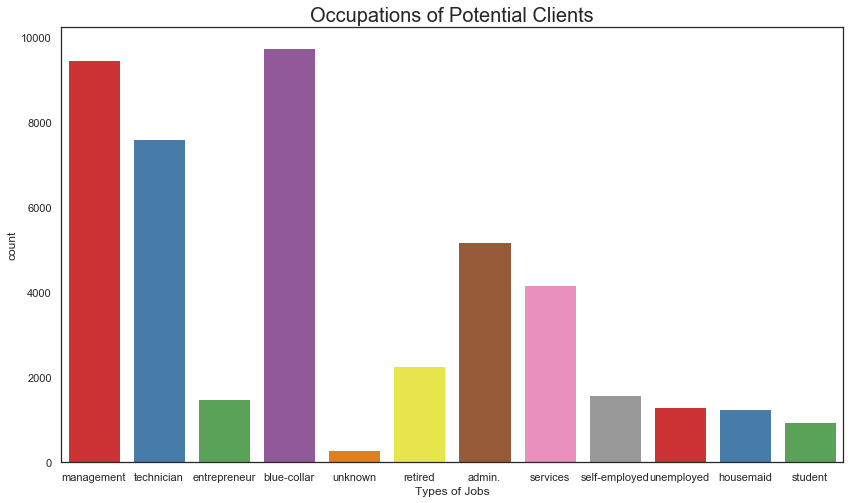

In [35]:
sns.set(style="white")
fig, ax = plt.subplots(figsize=(14,8))
sns.countplot(x="job", data=df, palette="Set1")
ax.set_title("Occupations of Potential Clients", fontsize=20)
ax.set_xlabel("Types of Jobs")
plt.show()


In [36]:
cross_job_category = pd.crosstab(df['deposit'], df['job']).apply(lambda x: x/x.sum() * 100)
print(cross_job_category)

job         admin.  blue-collar  entrepreneur  housemaid  management  \
deposit                                                                
0        87.797331    92.725031     91.728312  91.209677   86.244449   
1        12.202669     7.274969      8.271688   8.790323   13.755551   

job        retired  self-employed   services    student  technician  \
deposit                                                               
0        77.208481      88.157061  91.116996  71.321962   88.943004   
1        22.791519      11.842939   8.883004  28.678038   11.056996   

job      unemployed    unknown  
deposit                         
0         84.497314  88.194444  
1         15.502686  11.805556  


In [37]:
nodeposit_by_job = pd.DataFrame(cross_job_category.iloc[0])
nodeposit_by_job = np.around(nodeposit_by_job, 1)
nodeposit_by_job = nodeposit_by_job.values.tolist()
deposit_by_job = pd.DataFrame(cross_job_category.iloc[1])
deposit_by_job = np.around(deposit_by_job, 1)
deposit_by_job = deposit_by_job.values.tolist()

nodeposit_by_job


[[87.8],
 [92.7],
 [91.7],
 [91.2],
 [86.2],
 [77.2],
 [88.2],
 [91.1],
 [71.3],
 [88.9],
 [84.5],
 [88.2]]

In [38]:
deposit_by_job

[[12.2],
 [7.3],
 [8.3],
 [8.8],
 [13.8],
 [22.8],
 [11.8],
 [8.9],
 [28.7],
 [11.1],
 [15.5],
 [11.8]]

TypeError: xlabel() missing 1 required positional argument: 'xlabel'

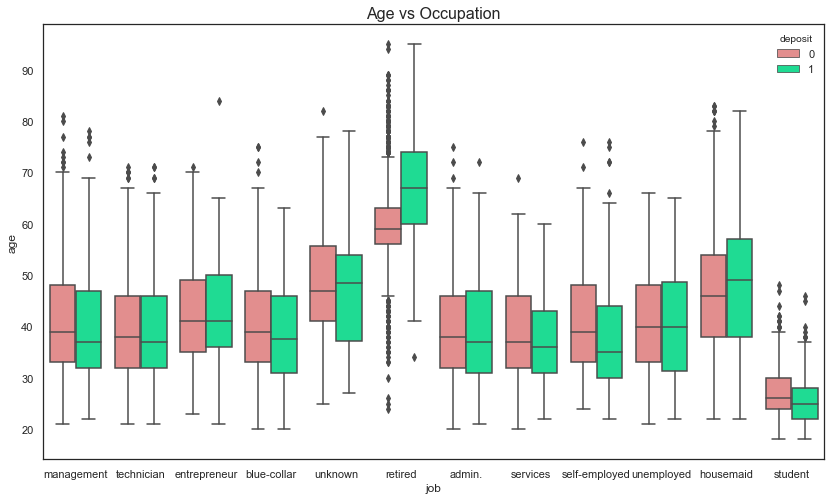

In [40]:
import seaborn as sns

# Consider removing this graph unless it tells us something.

ax = plt.figure(figsize=(14,8))
# 0 = Did not suscribe term deposits, 1 = Did suscribe term deposits.
ax = sns.boxplot(x="job", y="age", hue="deposit",
                  data=df, palette={0:'#F08080', 1:'#00FA9A'})
plt.title("Age vs Occupation", fontsize=16)
plt.xlabel(s="Type of Job", fontsize=14)
plt.ylabel(s="Age", fontsize=14)
legend_name = plt.legend()
legend_name.get_texts()[0].set_text('Refused Opening a T.D')
legend_name.get_texts()[1].set_text('Accepted Opening a T.D')

plt.show()


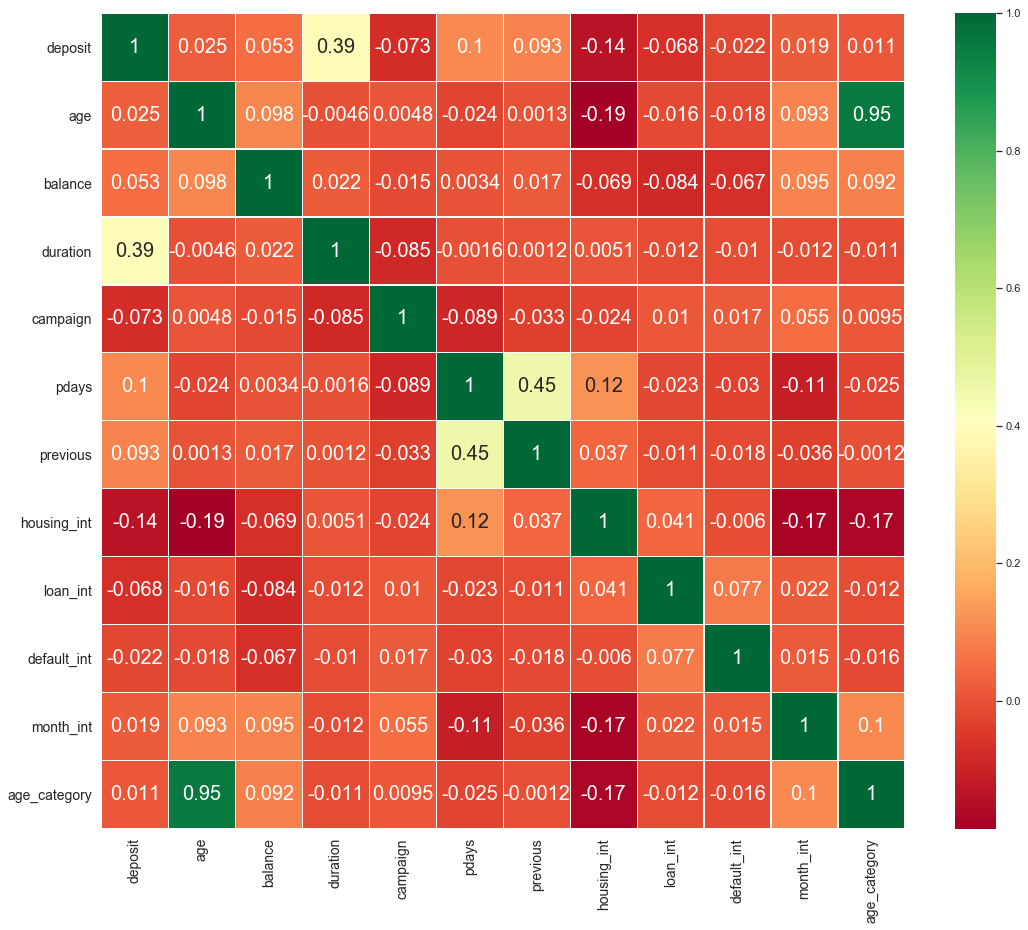

In [41]:
# 전체 변수 correlation 분석
corr = df.corr()

sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


In [42]:
df['balance_categories'] = np.nan

lst = [df]

for column in lst:
    column.loc[column['balance'] <= 0, 'balance_categories'] = 'no balance'
    column.loc[(column['balance'] > 0) & (column['balance'] <= 1000), 'balance_categories'] = 'low balance'
    column.loc[(column['balance'] > 1000) & (column['balance'] <= 5000), 'balance_categories'] = 'average balance'
    column.loc[column['balance'] > 5000, 'balance_categories'] = 'high balance'
    
df.head()
df['balance_categories'].value_counts()

low balance        23300
average balance    11786
no balance          7280
high balance        2845
Name: balance_categories, dtype: int64

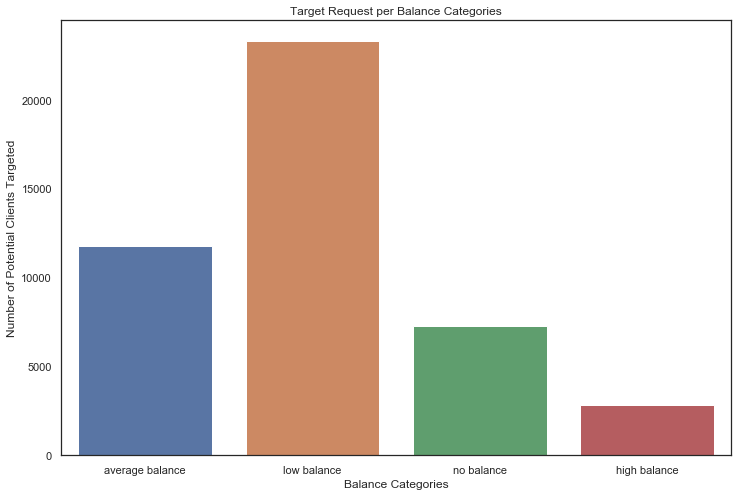

In [43]:
fig, ax = plt.subplots(figsize=(12,8))
g = sns.countplot(x="balance_categories", data=df)

plt.title("Target Request per Balance Categories")
plt.xlabel('Balance Categories')
plt.ylabel("Number of Potential Clients Targeted")

plt.show()

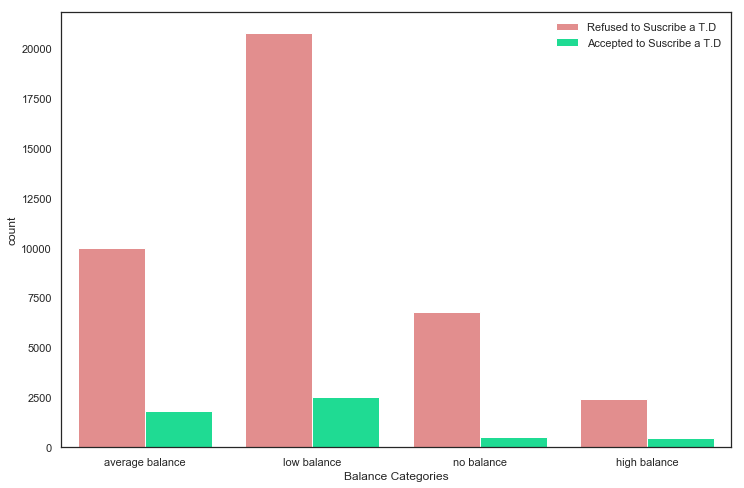

In [44]:
fig, ax = plt.subplots(figsize=(12,8))
g = sns.countplot(x="balance_categories", data=df, hue='deposit', palette={0:'#F08080', 1:'#00FA9A'})

legend_name = plt.legend()
legend_name.get_texts()[0].set_text('Refused to Suscribe a T.D')
legend_name.get_texts()[1].set_text('Accepted to Suscribe a T.D')
plt.xlabel('Balance Categories')


plt.show()


/Users/a80099708/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/Users/a80099708/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



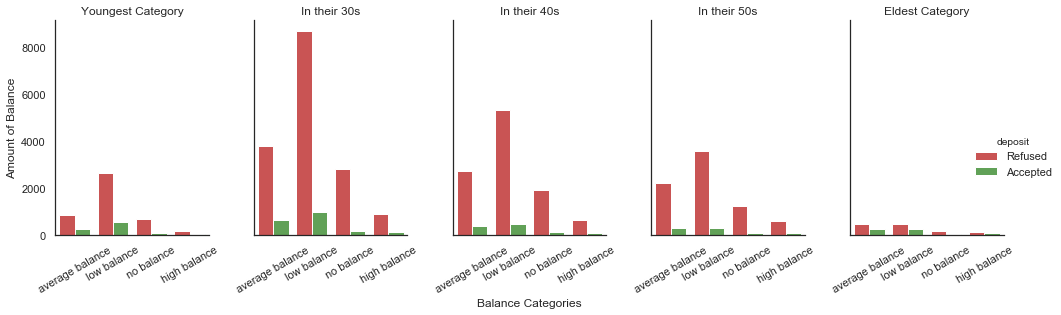

In [45]:
colors = ['255, 87, 51', '93, 109, 126  ']
labels = ["No", "Yes"]

g = sns.factorplot(x="balance_categories",
                   hue="deposit", col="age_category",
                   data=df, kind="count",
                   size=4, aspect=.7, palette={0:'#DD4040', 1:'#58AD4B'});

g.set_xticklabels(rotation=30)
g.axes[0,0].set_xlabel('')
g.axes[0,1].set_xlabel('')
g.axes[0,2].set_xlabel('Balance Categories')
g.axes[0,3].set_xlabel('')
g.axes[0,4].set_xlabel('')

# Set title
g.axes[0,0].set_title('Youngest Category')
g.axes[0,1].set_title('In their 30s')
g.axes[0,2].set_title('In their 40s')
g.axes[0,3].set_title('In their 50s')
g.axes[0,4].set_title('Eldest Category')
g.axes[0,0].set_ylabel('Amount of Balance')
# replace labels
new_labels = ['Refused', 'Accepted']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.show()


In [46]:
# 데이터 가공전 백업처리
df2 = df

In [47]:
# 문자형(범주형 변수) 제거
df2.head()

,deposit,age,job,marital,education,balance,contact,month,duration,campaign,pdays,previous,poutcome,housing_int,loan_int,default_int,month_int,age_category,balance_categories
0,0,58,management,married,tertiary,2143,unknown,may,4.35,1,-1,0,unknown,1,0,0,5,50,average balance
1,0,44,technician,single,secondary,29,unknown,may,2.52,1,-1,0,unknown,1,0,0,5,40,low balance
2,0,33,entrepreneur,married,secondary,2,unknown,may,1.27,1,-1,0,unknown,1,1,0,5,30,low balance
3,0,47,blue-collar,married,unknown,1506,unknown,may,1.53,1,-1,0,unknown,1,0,0,5,40,average balance
4,0,33,unknown,single,unknown,1,unknown,may,3.30,1,-1,0,unknown,0,0,0,5,30,low balance


In [48]:
# 변환전 3개 컬럼은 drop 처리한다.
df2.drop(['job', 'marital', 'education', 'contact', 'month', 'poutcome','age_category','balance_categories'], axis=1, inplace=True)

In [49]:
df2.head()

,deposit,age,balance,duration,campaign,pdays,previous,housing_int,loan_int,default_int,month_int
0,0,58,2143,4.35,1,-1,0,1,0,0,5
1,0,44,29,2.52,1,-1,0,1,0,0,5
2,0,33,2,1.27,1,-1,0,1,1,0,5
3,0,47,1506,1.53,1,-1,0,1,0,0,5
4,0,33,1,3.30,1,-1,0,0,0,0,5


In [50]:
# 특정 변수의 값이 지나치게 큰 값으로 되어, 계산에 영향을 주지 않도록 모든 변수의 범위를 -1 ~ 1 사이로 normalization 한다.
from sklearn.preprocessing import MinMaxScaler

nc = MinMaxScaler()

In [51]:
## values.reshape 은 메트릭스의 모양을 바꿔준다.
scaled_value_age = nc.fit_transform(df2['age'].values.reshape(-1,1))
scaled_value_balance = nc.fit_transform(df2['balance'].values.reshape(-1,1))
scaled_value_duration = nc.fit_transform(df2['duration'].values.reshape(-1,1))
scaled_value_month_int = nc.fit_transform(df2['month_int'].values.reshape(-1,1))

/Users/a80099708/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.

/Users/a80099708/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.

/Users/a80099708/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.



In [52]:
print(scaled_value_age, scaled_value_balance, scaled_value_duration, scaled_value_month_int)

[[0.51948052]
 [0.33766234]
 [0.19480519]
 ...
 [0.7012987 ]
 [0.50649351]
 [0.24675325]] [[0.09225936]
 [0.07306666]
 [0.07282153]
 ...
 [0.12468905]
 [0.07886805]
 [0.09977666]] [[0.0530682 ]
 [0.03074295]
 [0.01549347]
 ...
 [0.22910821]
 [0.10333049]
 [0.0734415 ]] [[0.36363636]
 [0.36363636]
 [0.36363636]
 ...
 [0.90909091]
 [0.90909091]
 [0.90909091]]


In [53]:
df2['age'] = scaled_value_age
df2['balance'] = scaled_value_balance
df2['duration'] = scaled_value_duration
df2['month_int'] = scaled_value_month_int

In [54]:
df2.head()

,deposit,age,balance,duration,campaign,pdays,previous,housing_int,loan_int,default_int,month_int
0,0,0.519481,0.092259,0.053068,1,-1,0,1,0,0,0.363636
1,0,0.337662,0.073067,0.030743,1,-1,0,1,0,0,0.363636
2,0,0.194805,0.072822,0.015493,1,-1,0,1,1,0,0.363636
3,0,0.376623,0.086476,0.018665,1,-1,0,1,0,0,0.363636
4,0,0.194805,0.072812,0.040259,1,-1,0,0,0,0,0.363636


In [55]:
# Classification 기준값인 deposit_class을 맨 뒤로 옮긴다.
dep = df2['deposit']
df2['deposit_class'] = dep
df2.drop(labels=['deposit'], axis=1,inplace = True)
df2.head()

,age,balance,duration,campaign,pdays,previous,housing_int,loan_int,default_int,month_int,deposit_class
0,0.519481,0.092259,0.053068,1,-1,0,1,0,0,0.363636,0
1,0.337662,0.073067,0.030743,1,-1,0,1,0,0,0.363636,0
2,0.194805,0.072822,0.015493,1,-1,0,1,1,0,0.363636,0
3,0.376623,0.086476,0.018665,1,-1,0,1,0,0,0.363636,0
4,0.194805,0.072812,0.040259,1,-1,0,0,0,0,0.363636,0


In [56]:
df2.dtypes

age              float64
balance          float64
duration         float64
campaign           int64
pdays              int64
previous           int64
housing_int        int64
loan_int           int64
default_int        int64
month_int        float64
deposit_class      int64
dtype: object

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
## numpy format을 iloc를 이용하여 pandas format으로 변환해줘야 한다. ','앞이 행, 그 뒤가 열
## [:,:-1] : 처음부터 맨 끝 앞까지만 가져온다   data.data 와 같은 의미
## [:,-1] : 처음ㅂ터 맨 끝 데이터까지 가져온다. data.target과 같은 의미
## random_state를 넣어주지 않으면 매번 다른 기준이 적용되므로, 42 옵션을 부여 관례적으로 부여한다.
X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:,:-1], df2.iloc[:,-1], test_size=0.3, random_state=42)

In [59]:
from sklearn.dummy import DummyClassifier
## 별도의 알고리즘 적용하지 않았을 경우의 성능을 먼저 예측한다.
du = DummyClassifier()

In [60]:
from sklearn.model_selection import GridSearchCV
gcv = GridSearchCV(DummyClassifier(),param_grid={'strategy':['stratified','most_frequent','prior','uniform']})

In [61]:
gcv.fit(X_train,y_train)

/Users/a80099708/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.



GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DummyClassifier(constant=None, random_state=None, strategy='stratified'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'strategy': ['stratified', 'most_frequent', 'prior', 'uniform']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [62]:
gcv.best_params_

{'strategy': 'most_frequent'}

In [63]:
## 알고리즘 적용을 하지 않아도  88.33%
gcv.best_score_

0.8833696716908396

In [64]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_jobs=3)

In [65]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=3, n_neighbors=5, p=2,
           weights='uniform')

In [66]:
## 주요 성능 측정값을 구해보자
a = classification_report(y_test,knn.predict(X_test))

In [67]:
print(a)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94     11966
           1       0.52      0.30      0.38      1598

   micro avg       0.88      0.88      0.88     13564
   macro avg       0.72      0.63      0.66     13564
weighted avg       0.87      0.88      0.87     13564



In [68]:
# 디폴트 knn 알고리즘을 적용했을때는 0.884768 으로 성능이 나왔다.
knn.score(X_test, y_test)

0.8847685048658213

In [69]:
from sklearn.metrics import confusion_matrix

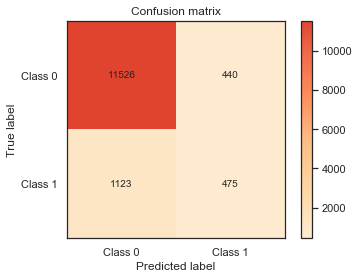

In [70]:
from sklearn_evaluation import plot
%matplotlib inline
plot.confusion_matrix(y_test, knn.predict(X_test))

In [71]:
## GridSearchCV를 이용해서 최적의 파라미터 조합을 찾아보자.
## 파라미터의 경우의 수가 많아서 cv=3으로 최소화하고, cpu는 최대한으로 사용한다.
##par = { 'n_neighbors' : [x for x in range(3,6)], 'weights' : ['uniform', 'distance'], 'leaf_size' : [30,100,500]}
par = { 'n_neighbors' : [x for x in range(3,6)], 'weights' : ['uniform', 'distance']}

In [72]:
gcv = GridSearchCV(knn,par,n_jobs=3,cv=3)
gcv.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=3, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'n_neighbors': [3, 4, 5], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [73]:
gcv.best_params_

{'n_neighbors': 4, 'weights': 'uniform'}

In [74]:
gcv.best_score_

0.8854235788542358

In [75]:
knn = KNeighborsClassifier(n_neighbors=4,weights='uniform',n_jobs=3)

In [76]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=3, n_neighbors=4, p=2,
           weights='uniform')

In [77]:
## 주요 성능 측정값을 구해보자
a = classification_report(y_test,knn.predict(X_test),digits=7)

In [78]:
print(a)

              precision    recall  f1-score   support

           0  0.9013878 0.9770182 0.9376805     11966
           1  0.5370370 0.1996245 0.2910584      1598

   micro avg  0.8854320 0.8854320 0.8854320     13564
   macro avg  0.7192124 0.5883214 0.6143694     13564
weighted avg  0.8584630 0.8854320 0.8615007     13564



In [79]:
knn.score(X_test, y_test)

0.8854320259510469

In [80]:
from sklearn.svm import SVC

In [81]:
svm = SVC()

In [82]:
## GridSearchCV를 이용해서 최적의 파라미터 조합을 찾아보자.
## 파라미터의 경우의 수가 많아서 cv=3으로 최소화하고, cpu는 최대한으로 사용한다.
par = { 'C' : [0.01,1.0,100]}

In [83]:
gcv = GridSearchCV(svm,par,n_jobs=3,cv=3)

In [84]:
gcv.fit(X_train, y_train)

/Users/a80099708/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:700: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

/Users/a80099708/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:700: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

/Users/a80099708/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:700: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

/Users/a80099708/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscal

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'C': [0.01, 1.0, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [85]:
gcv.best_params_

{'C': 1.0}

In [86]:
gcv.best_score_

0.8864663317218062

In [87]:
svm = SVC(C=1.0)

In [88]:
svm.fit(X_train, y_train)

/Users/a80099708/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [89]:
## 주요 성능 측정값을 구해보자
a = classification_report(y_test,svm.predict(X_test),digits=7)

In [90]:
print(a)

              precision    recall  f1-score   support

           0  0.8932368 0.9900552 0.9391573     11966
           1  0.6046512 0.1138924 0.1916798      1598

   micro avg  0.8868328 0.8868328 0.8868328     13564
   macro avg  0.7489440 0.5519738 0.5654186     13564
weighted avg  0.8592380 0.8868328 0.8510956     13564



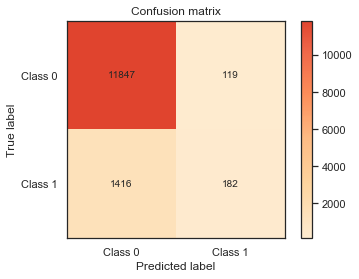

In [91]:
plot.confusion_matrix(y_test, svm.predict(X_test))

In [92]:
svm.score(X_test, y_test)

0.8868327926865232

In [93]:
from sklearn.ensemble import IsolationForest

In [94]:
forest = IsolationForest(n_jobs=3, random_state=42)

In [95]:
from sklearn.model_selection import StratifiedKFold

In [96]:
## kFold를 사용하면, 무작위로 추출된 데이터에 비정상데이터가 포함될 확률이 너무 낮아진다.
## StratifiedKFold를 이용하여 학습데이트의 비율정도는 유지할 수 있도록 해야 한다. 
skf = StratifiedKFold(n_splits=3)

In [97]:
folds = list(skf.split(X_train, y_train))

In [98]:
forest.contamination = sum(y_train==-1)/len(y_train)

In [99]:
## 파라미터변수 중 n_estimators를 4개 정도 세팅해준다. default는 100
## max_samples='auto', contamination=0.1  두개도 중요한 파라미터임
## max_samples의 이상적인 범위를 추측할 수 없어 auto로 사용한다.
par = {'n_estimators': [10, 50, 100, 150],'contamination':[0.0001,0.01,0.1]}

In [100]:
gcv = GridSearchCV(estimator=forest, param_grid=par, scoring='f1_micro', cv=folds, n_jobs=3)

In [101]:
gcv.fit(X_train, y_train)

/Users/a80099708/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:224: FutureWarning:

behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.



GridSearchCV(cv=[(array([10266, 10267, ..., 31645, 31646]), array([    0,     1, ..., 10583, 10584])), (array([    0,     1, ..., 31645, 31646]), array([10266, 10267, ..., 21099, 21101])), (array([    0,     1, ..., 21099, 21101]), array([21097, 21098, ..., 31645, 31646]))],
       error_score='raise-deprecating',
       estimator=IsolationForest(behaviour='old', bootstrap=False, contamination=0.0,
        max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=3,
        random_state=42, verbose=0),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'n_estimators': [10, 50, 100, 150], 'contamination': [0.0001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_micro', verbose=0)

In [102]:
gcv.best_params_

{'contamination': 0.0001, 'n_estimators': 100}

In [103]:
## GridSearchCV에서 나온 최적값으로 IsolationForest를 생성한다.
forest = IsolationForest(n_estimators=100,contamination=0.0001,n_jobs=3, random_state=42)

In [104]:
forest.fit(X_train, y_train)

/Users/a80099708/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:224: FutureWarning:

behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.



IsolationForest(behaviour='old', bootstrap=False, contamination=0.0001,
        max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=3,
        random_state=42, verbose=0)

In [109]:
##isolation forest로 학습한 모델의 예측치를 확인
y_pred_train = forest.predict(X_train)

/Users/a80099708/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:418: DeprecationWarning:

threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.



In [110]:
y_pred_train

array([1, 1, 1, ..., 1, 1, 1])

In [111]:
## 1이 정상이므로, class 0(예금 미가입)과 맞춰주기 위해 변경
for n, i in enumerate(y_pred_train):
    if i == 1:
        y_pred_train[n] = 0

In [112]:
## -1이 비정상이므로, class 1(예금 가입)과 맞춰주기 위해 변경
for n, i in enumerate(y_pred_train):
    if i == -1:
        y_pred_train[n] = 1

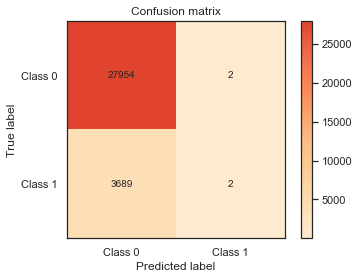

In [113]:
plot.confusion_matrix(y_train, y_pred_train)

In [114]:
a = classification_report(y_train,y_pred_train,digits=7)

In [115]:
print(a)

              precision    recall  f1-score   support

           0  0.8834181 0.9999285 0.9380694     27956
           1  0.5000000 0.0005419 0.0010825      3691

   micro avg  0.8833697 0.8833697 0.8833697     31647
   macro avg  0.6917091 0.5002352 0.4695760     31647
weighted avg  0.8387000 0.8833697 0.8287883     31647



In [116]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
Rforest = RandomForestClassifier(n_estimators=5, random_state=42)

In [129]:
par = {'n_estimators': [50, 100, 150, 10],'random_state':[100,200,300],'max_depth':[x for x in range(3,10)]}

In [130]:
gcv = GridSearchCV(estimator=Rforest, param_grid=par, cv=3, n_jobs=-1)

In [131]:
gcv.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [50, 100, 150, 10], 'random_state': [100, 200, 300], 'max_depth': [3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [132]:
gcv.best_params_

{'max_depth': 9, 'n_estimators': 150, 'random_state': 100}

In [170]:
Rforest = RandomForestClassifier(n_estimators=150, random_state=100, max_depth=15)
Rforest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [171]:
Rforest.score(X_train, y_train)

0.972382848295257

In [172]:
## 주요 성능 측정값을 구해보자
a = classification_report(y_test,Rforest.predict(X_test),digits=7)

In [173]:
print(a)

              precision    recall  f1-score   support

           0  0.9245042 0.9660705 0.9448304     11966
           1  0.6169811 0.4092616 0.4920993      1598

   micro avg  0.9004718 0.9004718 0.9004718     13564
   macro avg  0.7707426 0.6876661 0.7184649     13564
weighted avg  0.8882743 0.9004718 0.8914933     13564



In [174]:
Rforest.score(X_test, y_test)

0.9004718372161604

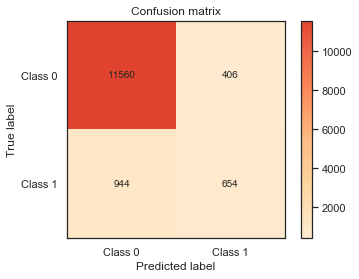

In [175]:
plot.confusion_matrix(y_test, Rforest.predict(X_test))